In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

### Importing the dataset

In [5]:
fashion = tf.keras.datasets.fashion_mnist

### Splitting the dataset

In [6]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()
X_train = X_train/255.0
X_test = X_test/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

### Expending the array
#### we're doing this because cnn expects 3 dims -> height, width, color

In [8]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

### Number of classes

In [9]:
classes = len(set(y_train))
classes

10

### Building the model

In [10]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(classes, activation='softmax')(x)

model = Model(i, x)

### Complie and Fit

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

trained = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 40s 4ms/step - loss: 0.7085 - accuracy: 0.7385 - val_loss: 0.4183 - val_accuracy: 0.8383
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3780 - accuracy: 0.8560 - val_loss: 0.3585 - val_accuracy: 0.8696
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3238 - accuracy: 0.8784 - val_loss: 0.3159 - val_accuracy: 0.8824
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2807 - accuracy: 0.8952 - val_loss: 0.3063 - val_accuracy: 0.8843
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2544 - accuracy: 0.9040 - val_loss: 0.3012 - val_accuracy: 0.8911
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2318 - accuracy: 0.9105 - val_loss: 0.2844 - val_accuracy: 0.8999
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2151 - accuracy: 0.9179 - val_loss: 0.3045 - val_accuracy

### Predicting

In [21]:
labels = '''
T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
'''.split()

In [14]:
prediction = model.predict(X_test).argmax(axis=1)
confusion_mat = confusion_matrix(y_test, prediction)

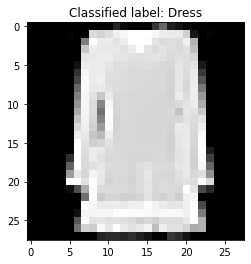

In [24]:
classified = np.where(prediction == y_test)[0]
idx = np.random.choice(classified)
plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
plt.title(f"Classified label: {labels[y_test[idx]]}")
plt.show()

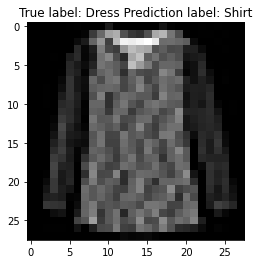

In [26]:
miss_classified = np.where(prediction != y_test)[0]
idx = np.random.choice(miss_classified)
plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
plt.title(f"True label: {labels[y_test[idx]]} Prediction label: {labels[prediction[idx]]}")
plt.show()